# Validación Cruzada

La `validación hold-out` es sencilla de realizar, económica (en términos de tiempo computacional) y ampliamente utilizada. No obstante, presenta un grave inconveniente y es la escasa representatividad de los resultados que se obtienen. Esto es, los algoritmos de aprendizaje solo se evalúan utilizando un único conjunto de test. Dado un mismo conjunto de datos, la elección del conjunto de test puede (y, de hecho, suele) hacer variar significativamente las métricas de bondad.

>Note: Extraer un único subconjunto de test del conjunto de datos del problema y probar los algoritmos con él conduce habitualmente a resultados sesgados a las particularidades del conjunto de test elegido.
Necesitamos, por tanto, esquemas de validación que proporcionen resultados de bondad más generales
y que nos permitan escoger los mejores algoritmos con mayor confianza.

La técnica de validación más uilizada que posee las características de generalidad y representatividad de sus resultados es la `validación cruzada` (CV, de cross validation en inglés).

La validación cruzada consiste en partir, en primer lugar, el conjunto de datos original en `K` subconjuntos (también llamados bolsas, folds en inglés) de igual tamaño. Por ejemplo, si el conjunto de datos posee `150` ejemplos (como en el caso de “iris”) y `K = 10`, entonces las `10` bolsas tendrían `15` ejemplos cada una.

Una vez partido el conjunto de datos en `K` bolsas, se realizan `K` validaciones de tipo hold-out
empleando, en cada validación, como test una bolsa distinta y como entrenamiento el resto de ejemplos
de las demás bolsas. En la tabla se ilustra gráficamente el proceso de validación cruzada con
`K = 5` bolsas.

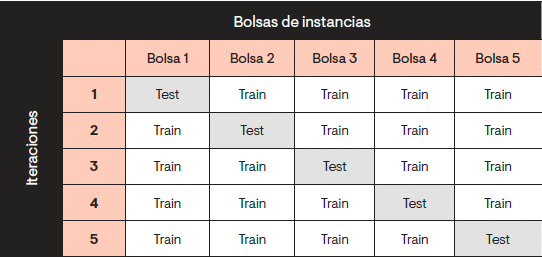

Tal como se puede apreciar en la Tabla 3, se realizan 5 iteraciones de validación cruzada. En cada iteración,la bolsa utilizada como test está marcada en gris, mientras que el resto de bolsas (las marcadas en blanco) se utilizan como entrenamiento (train).

>Note: **La validación cruzada no se puede aplicar en series temporales**

## Ejemplo

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Carga de datos.
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

In [ ]:
# Validación cruzada.

# Shuffle permite aleatorizar las bolsas de test vez de hacer una lectura por orden 
kf = KFold(n_splits = 3) 
bolsas = kf.split(X)
print(bolsas)

In [ ]:
# Mostrar ejemplos de cada iteración.
k = 1
for train, test in bolsas:
    print("Iteracion", k, ":")
    print(" - Entrenamiento: %s" % (train)) 
    print(" - Test: %s" % (test))
    k = k + 1

En el Programa creamos un conjunto de datos de `10` instancias con un único atributo de tipo categórico
(cadena de caracteres, en particular) y sin clase, que almacenamos en la variable `X`. 

A continuación, mediante la clase `KFold` y el método `split()` troceamos la tabla de datos en `K = 3` pares de subconjuntos de entrenamiento/test, tal como se muestra en la Salida.

Nótese que en la primera iteración se tienen 4 ejemplos en el test, a diferencia del resto de iteraciones, que tienen 3. Esto es debido a que el reparto de 10 ejemplos entre `K = 3` no es exacto (división inexacta)